## Une image pour étudier un signal sonore

Nous allons représenter un signal sonore comme une image en utilisant son spectrogramme, c'est à dire le module de sa transformée de Fourier à court terme.

Text(0.5, 1.0, 'zoom sur les basses fréquences')

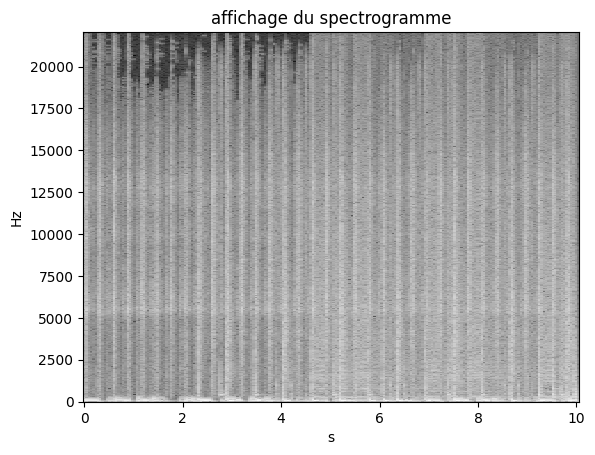

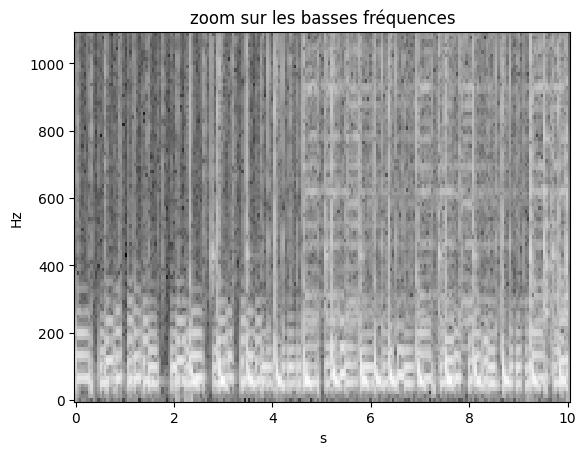

In [19]:
%matplotlib inline
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

import soundfile as sf
import IPython.display 


x_loop, Fe = sf.read("../audio_notebooks/myloop.wav")
x_loop = x_loop[:10*Fe,0] # nous ne prenons qu'un seul canal et 10 secondes uniquement

f, t, tfct = sig.stft(x_loop, fs=1, nperseg=4096)
image = np.log(np.abs(tfct))
plt.figure(1)
#plt.imshow(image, aspect='auto', extent = [t[0]/Fe, t[-1]/Fe, f[-1]*Fe, f[0]*Fe], cmap='gray')  
# imshow met les pixels de haut en bas donc dans le cas présent, on utilise plutôt pcolormesh 
#      pour avoir les basses fréquences en bas et les hautes fréquence en haut
plt.pcolormesh(t/Fe, f*Fe, image, shading='auto', cmap='gray')  
plt.xlabel('s')
plt.ylabel('Hz')
plt.title('affichage du spectrogramme')
plt.figure(2)
plt.pcolormesh(t/Fe, f[:len(f)//20]*Fe, image[:len(f)//20, :], shading='auto', cmap='gray')
plt.xlabel('s')
plt.ylabel('Hz')
plt.title('zoom sur les basses fréquences')


Le but de ce notebook est de créer deux filtres 2D: un qui détecte des lignes horizontales et un qui détecte des lignes verticales. Pour cela, il faut définir un noyau de convolution h et l'appliquer sur l'image.

## Fitre passe-bas
Commençons par créer un filtre passe-bas 2D.

Construire un noyau de filtre 2D séparable de la forme $h(x,y)=𝑤(x)𝑤(y)$
en utilisant le produit tensoriel de Python et la fonction hanning pour des valeurs faibles de longueur 𝐿 (typ. de 3 à 51).
Rque : np.outer(vecteur, vecteur) = matrice.

On normalisera le noyau de manière à avoir $\hat h(0,0)=1$.

Filtrer l’image à l’aide de scipy.signal.convolve2d et afficher le résultat : filtered_image = sig.convolve2d(I, np.rot90(h), mode='same')

Quel est l’effet de ce filtrage ? Quel rôle joue le paramètre L ?

[[0.     0.     0.     0.     0.    ]
 [0.     0.0625 0.125  0.0625 0.    ]
 [0.     0.125  0.25   0.125  0.    ]
 [0.     0.0625 0.125  0.0625 0.    ]
 [0.     0.     0.     0.     0.    ]]
(1+0j)


Text(0.5, 1.0, 'zoom sur les basses fréquences')

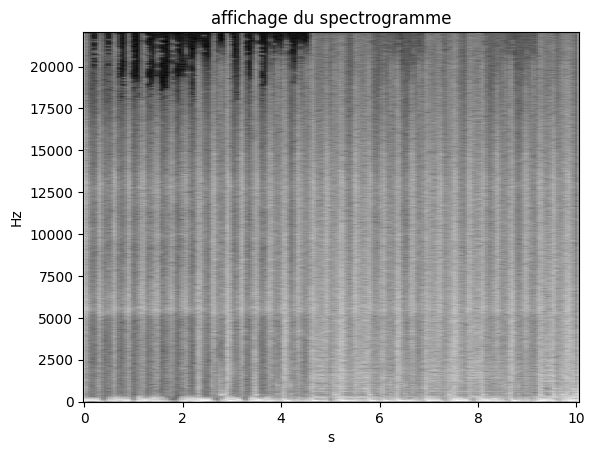

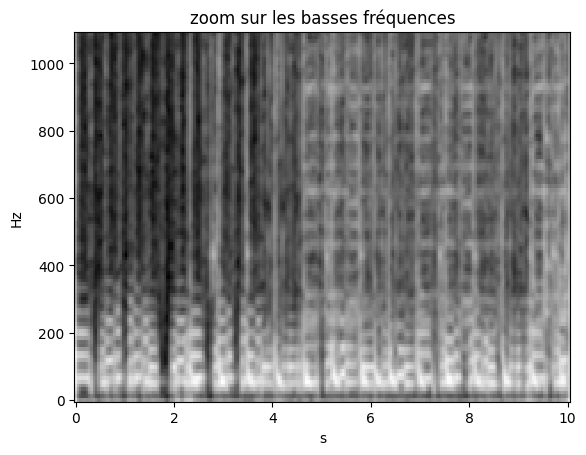

In [24]:
h = np.hanning(5)
H = np.outer(h, h)/4
print(H)
print(np.fft.fft2(H)[0,0])

image2 = sig.convolve2d(image, H, mode='same')


plt.figure(1)
#plt.imshow(image, aspect='auto', extent = [t[0]/Fe, t[-1]/Fe, f[-1]*Fe, f[0]*Fe], cmap='gray')  
# imshow met les pixels de haut en bas donc dans le cas présent, on utilise plutôt pcolormesh 
#      pour avoir les basses fréquences en bas et les hautes fréquence en haut
plt.pcolormesh(t/Fe, f*Fe, image2, shading='auto', cmap='gray')  
plt.xlabel('s')
plt.ylabel('Hz')
plt.title('affichage du spectrogramme')
plt.figure(2)
plt.pcolormesh(t/Fe, f[:len(f)//20]*Fe, image2[:len(f)//20, :], shading='auto', cmap='gray')
plt.xlabel('s')
plt.ylabel('Hz')
plt.title('zoom sur les basses fréquences')

## filtre passe-haut vertical et passe-bas horizontal

Proposer un autre noyau de convolution qui amplifie les variations dans une direction et les aténue dans l'autre

1.0


Text(0.5, 1.0, 'zoom sur les basses fréquences')

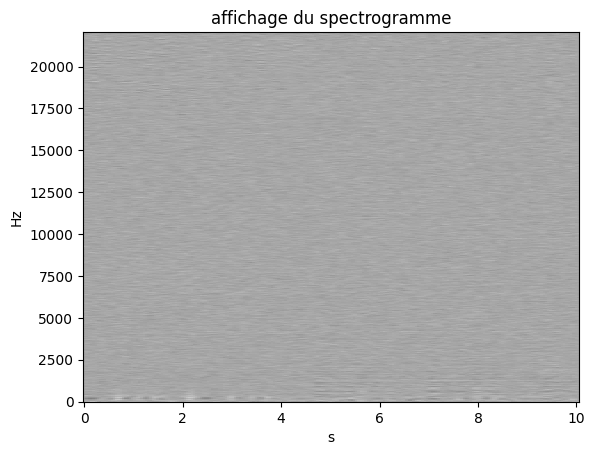

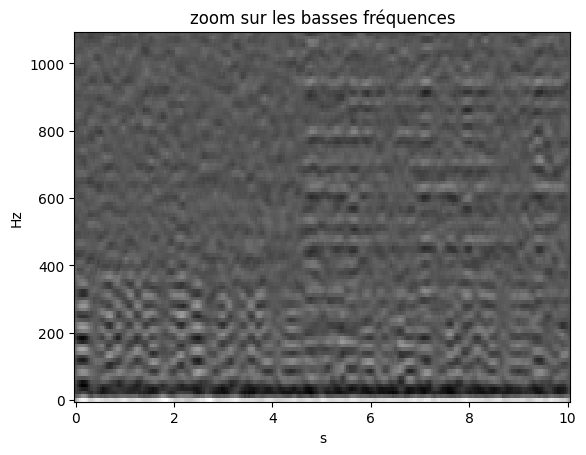

In [48]:
H = [[1, 0, -1, 0, 1],
     [0, -1, -3, -1, 0],
     [1, 3, 9, 3, 1],
     [0, -1, -3, -1, 0],
     [1, 0, -1, 0, 1]]

H = [[3, 10, 3],
     [0, 1, 0],
     [-3, -10, -3]]

h1 = np.array([1, 2, 4, 2, 1])
h2 = np.array([-1, -2, 1e-9, 2, 1])
H = np.outer(h2, h1)



H = H / np.abs(np.fft.fft2(H)[0,0])
print(np.abs(np.fft.fft2(H)[0,0]))






image2 = sig.convolve2d(image, H, mode='same')


plt.figure(1)
#plt.imshow(image, aspect='auto', extent = [t[0]/Fe, t[-1]/Fe, f[-1]*Fe, f[0]*Fe], cmap='gray')  
# imshow met les pixels de haut en bas donc dans le cas présent, on utilise plutôt pcolormesh 
#      pour avoir les basses fréquences en bas et les hautes fréquence en haut
plt.pcolormesh(t/Fe, f*Fe, image2, shading='auto', cmap='gray')  
plt.xlabel('s')
plt.ylabel('Hz')
plt.title('affichage du spectrogramme')
plt.figure(2)
plt.pcolormesh(t/Fe, f[:len(f)//20]*Fe, image2[:len(f)//20, :], shading='auto', cmap='gray')
plt.xlabel('s')
plt.ylabel('Hz')
plt.title('zoom sur les basses fréquences')